In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Read dataset to a dataframe
df = pd.read_csv('Kidney Patients Data.csv',encoding='windows-1254')

df.head()

,Name,Age,Gender,Address,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,TP,Having kidney disease
0,Yasawathi Karunarathna,46,Female,"Abayapura Rd, Padaviya",Primary,Forces,70000,Public well,Smoking,Yes,Yes,No,746985260.0,Yes
1,Wimalaweera,66,Male,"Ikiriwawa Rd ,Thmbuthegama",05 grade,Other,33500,Public well,Smoking,No,No,No,703569874.0,Yes
2,Wimalawathi,50,Female,"Ambalama Mawatha,Mahadivulwawa, Kakirawa",OL,Other,37000,Public well,Not smoking,No,No,No,758952834.0,Yes
3,Wijitha Amunugama,57,Male,"Labunoruwa ,Thirippane",AL,Retired,24500,Public well,Smoking,No,No,No,745296325.0,Yes
4,Wasanthi,50,Female,"Kala Gama,Thmbuthegama",AL,Retired,25000,Tube well,Smoking,Yes,Yes,No,375832456.0,Yes


In [3]:
df.columns

Index(['Name', 'Age', 'Gender', 'Address', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'TP', 'Having kidney disease'],
      dtype='object')

In [4]:
df.dtypes

Name                                                                            object
Age                                                                              int64
Gender                                                                          object
Address                                                                         object
Education                                                                       object
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      object
Monthly Income                                                                   int64
Source of water for drinking(tube well/public well/private well/pipe bourn)     object
Smorking or not                                                                 object
Using alcohol or not                                                            object
Using betel nut or not                                                          object
Do you have any of this disorders diabetes/

In [5]:
df = df.drop(['Name', 'Address','TP'], axis=1)

In [6]:
df.isnull().sum()

Age                                                                             0
Gender                                                                          0
Education                                                                       1
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      0
Monthly Income                                                                  0
Source of water for drinking(tube well/public well/private well/pipe bourn)     2
Smorking or not                                                                 3
Using alcohol or not                                                            0
Using betel nut or not                                                          0
Do you have any of this disorders diabetes/stress/blood pressure               10
Having kidney disease                                                           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
cols = ['Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ', 'Having kidney disease']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,Having kidney disease
0,46,0,13,2,70000,2,2,1,1,1,1
1,66,1,1,4,33500,2,2,0,0,1,1
2,50,0,12,4,37000,2,1,0,0,1,1
3,57,1,8,5,24500,2,2,0,0,1,1
4,50,0,8,5,25000,4,2,1,1,1,1


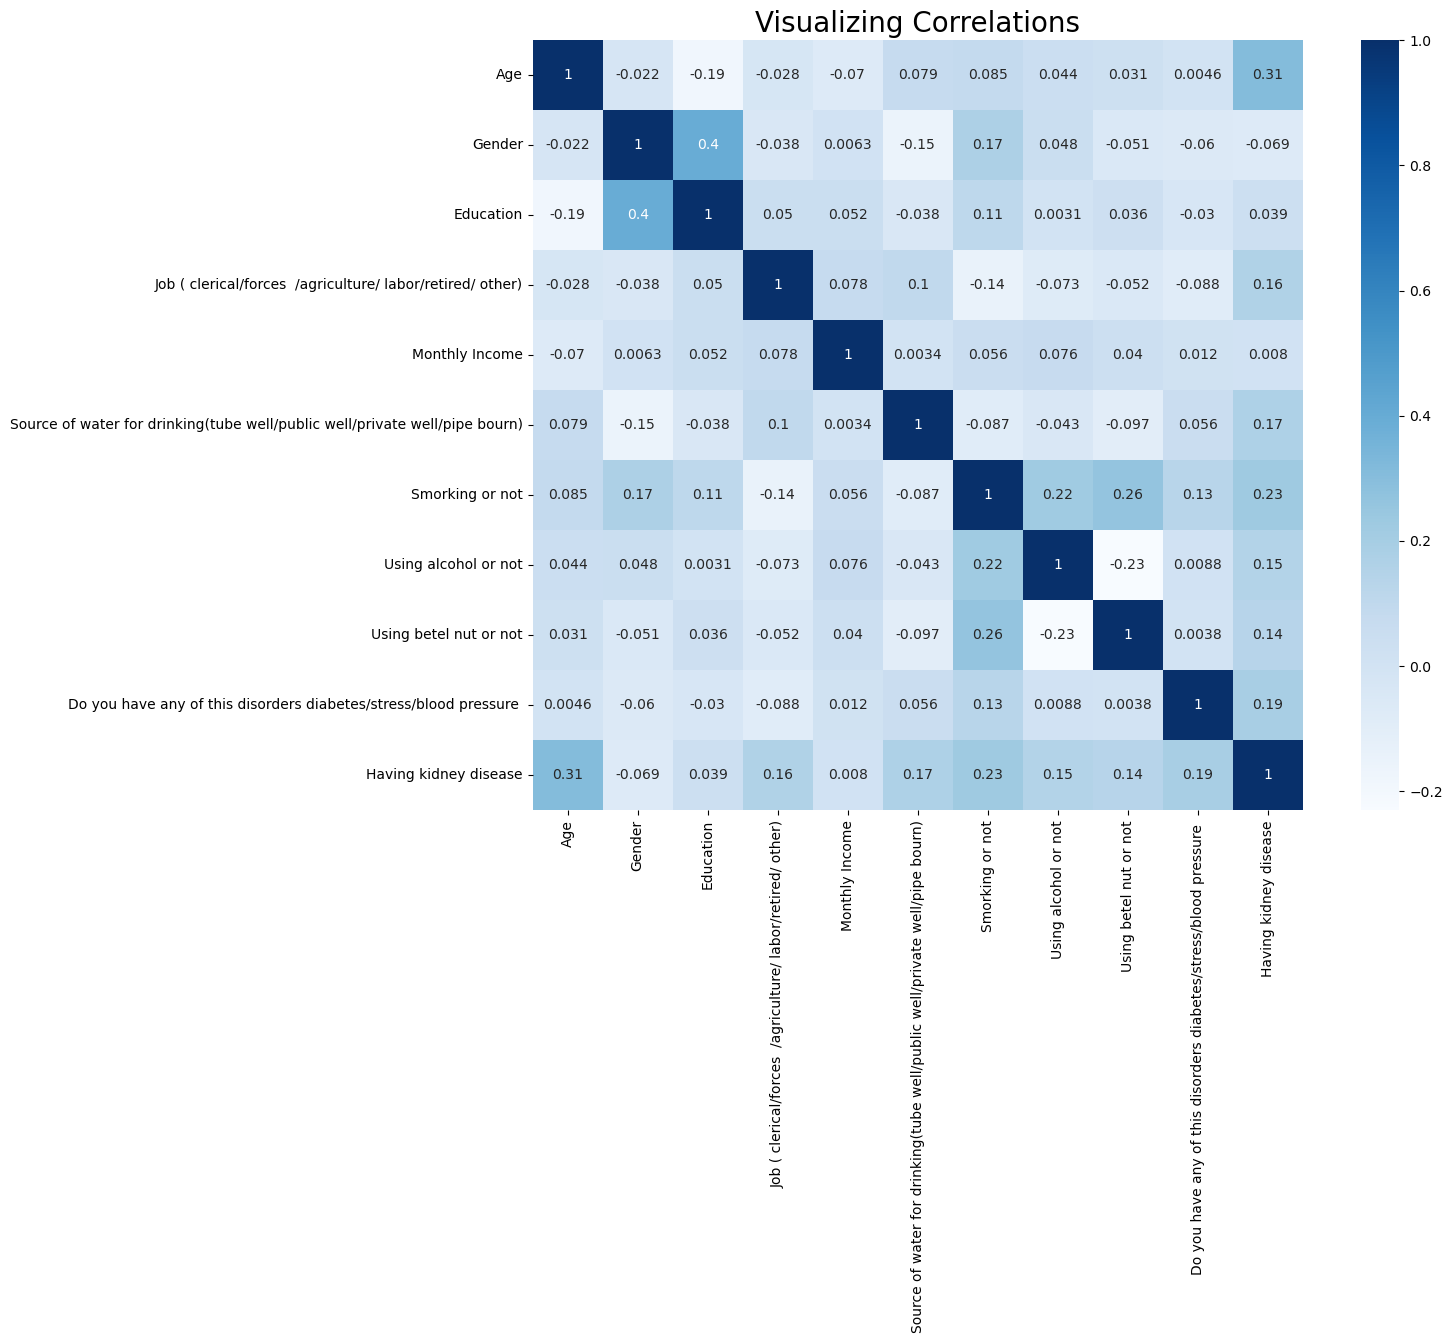

In [9]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [10]:
# df2 = df.drop('Having kidney disease', axis=1)

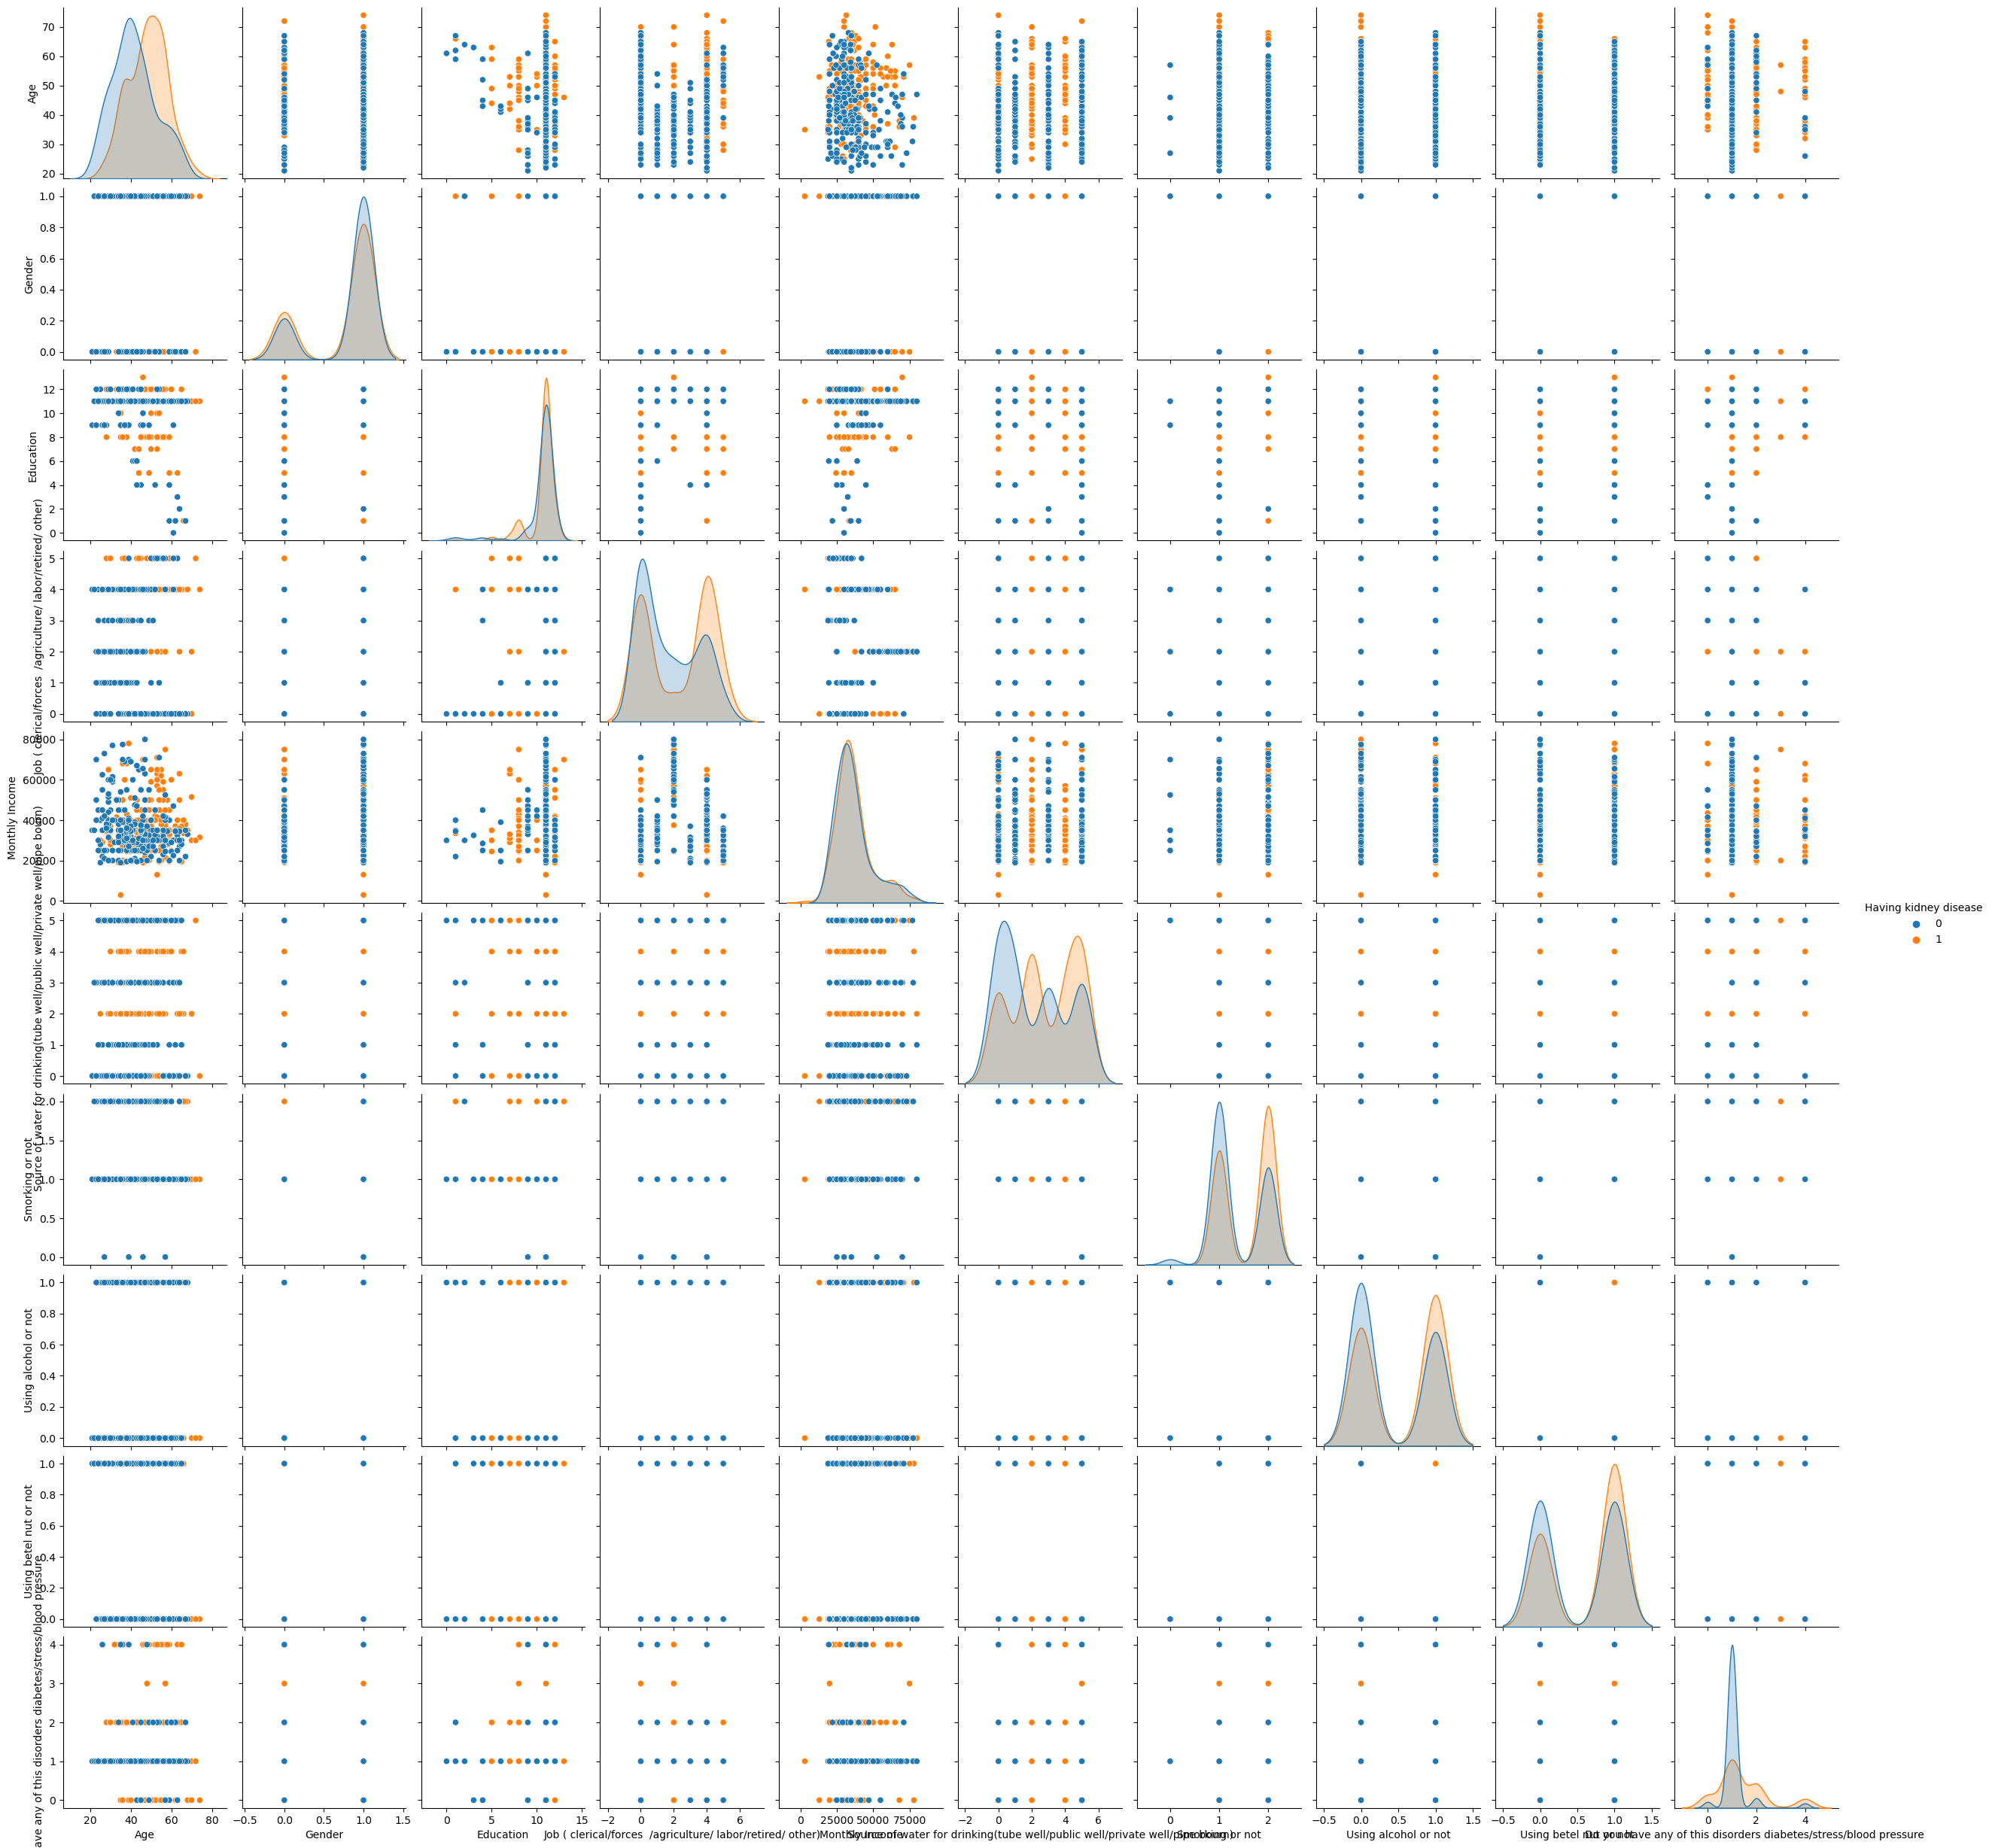

In [11]:
sns.pairplot(df,hue='Having kidney disease')

C:\Users\ayodh\AppData\Local\Temp\ipykernel_22140\4250424768.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]], hist=True, rug=True, color='b')
C:\Users\ayodh\AppData\Local\Temp\ipykernel_22140\4250424768.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]], hist

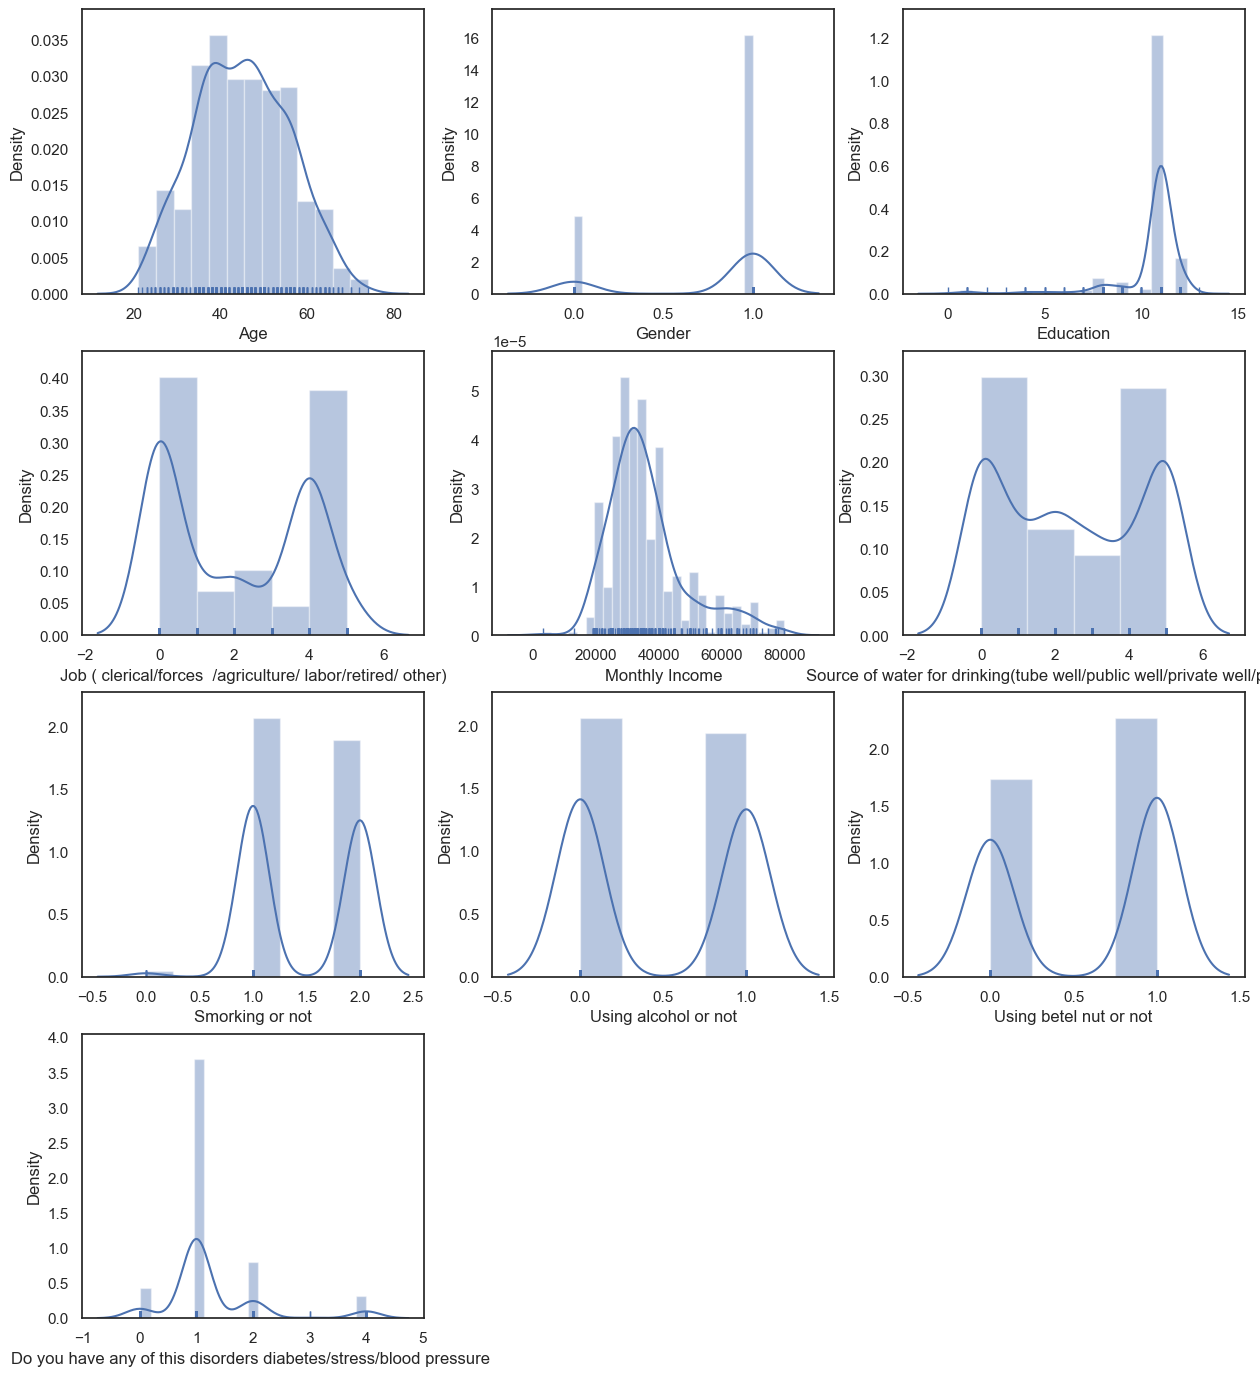

In [12]:
columns=df.columns
columns=list(columns)
columns.pop()

sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color='b')

In [13]:
df.columns

Index(['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'Having kidney disease'],
      dtype='object')

In [14]:
x = df[['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',]].values


y = df['Having kidney disease'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25)

In [16]:
x_train.shape
y_train.shape

(361,)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09090909090909091

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.30151134457776363

In [21]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.9090163934426229

In [22]:
rf.score(x_test,y_test)

0.9090909090909091

Confusion matrix

 [[56  5]
 [ 6 54]]


<Axes: >

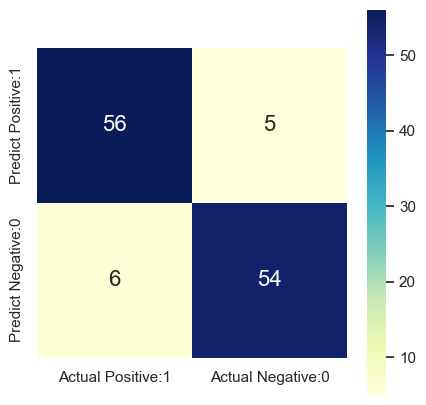

In [23]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True, ax=ax, annot_kws={"fontsize":16})

In [24]:
df.tail()

,Age,Gender,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,Having kidney disease
492,64,1,2,0,30000,3,2,1,0,1,0
493,27,1,9,0,25000,5,0,1,0,1,0
494,30,1,12,2,60000,5,2,0,0,1,0
495,45,1,12,0,37500,0,2,0,1,1,0
496,53,1,12,5,35000,5,1,1,0,1,0


In [25]:
rf.predict([[64,0,13,2,3000,2,2,1,1]])

array([1])

In [26]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))

In [27]:
model = pickle.load(open('model.pkl','rb'))
print(rf.predict([[1,1,1,1,1,1,1,1,1]]))

[0]
